In [1]:
import pandas as pd

# Load the data into a Pandas DataFrame
train_df = pd.read_csv("c3_train_df.csv")
train_df.head()

,temp,users
0,0.5400,884
1,0.7942,662
2,0.4875,830
3,0.4350,1192
4,0.4358,259


In [2]:
import numpy as np

# Extract the target
y_train = train_df.users.values

# Compute baseline
pred_baseline = np.mean(y_train)  
pred_baseline

695.2582781456954

In [3]:
# see how good baseline is loading test

# Load test data
test_df = pd.read_csv("c3_three-models.csv")
test_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


first model is a simple linear regression. We use the polyfit() function with degree equal to 1. Then we use the fitted model to predict the target for the second half of the data, i.e. test data. The predictions are named as pred_lr in the third column.

second model, we change the degree to 3, and follow the same steps. The predictions are named as pred_poly3 in the fourth column.

we still fit a polynomial of degree 3, but with the HuberRegressor and the PolynomialFeatures objects from Scikit-learn.

In [4]:
# calculate error of baseline

# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [5]:
# Extract the target
y_test = test_df.users.values

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline 

316.3029253102934

In [8]:
# Vector with predictions from the baseline
pred_baseline = np.full_like(y_test, fill_value=np.mean(y_train), dtype=float)
print(len(pred_baseline), len(y_test))

151 151


In [9]:
# use dummy regressor to calc baselines

from sklearn.dummy import DummyRegressor

# create dummy regressor object
dummy = DummyRegressor(strategy="mean")

In [10]:
# Extract the features
x_train = train_df.temp.values

# Fit the estimator
dummy.fit(x_train[:, np.newaxis], y_train)

DummyRegressor()

In [11]:
# Extract the features
x_test = test_df.temp.values

# Vector with predictions from the baseline
pred_baseline = dummy.predict(x_test[:, np.newaxis])

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline 

316.3029253102934

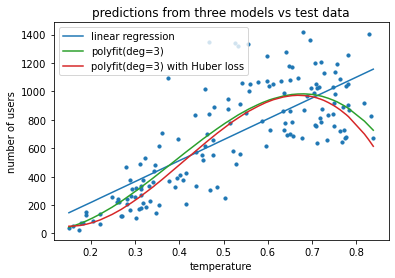

In [15]:
# visualize the test data and predictions

import matplotlib.pyplot as plt
%matplotlib inline

# extract variables
x_test = test_df.temp.values

# plot models
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, test_df.pred_lr, c="C0", label='linear regression')
plt.plot(x_test, test_df.pred_poly3, c="C2", label="polyfit(deg=3)")
plt.plot(x_test, test_df.pred_huber3, c="C3", label="polyfit(deg=3) with Huber loss")

plt.title('predictions from three models vs test data')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend(loc='upper left')
plt.show()

In [17]:
# root mean square error (ie independent of number of data points as its an average)
def RMSE(y, y_pred):
    mse = np.mean(np.square(y-y_pred)) # MSE
    return np.sqrt(mse) # RMSE


rmse_baseline = RMSE(y_test, pred_baseline)
rmse_lr     = RMSE(y_test, test_df.pred_lr)
rmse_poly3  = RMSE(y_test, test_df.pred_poly3)
rmse_huber3 = RMSE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", rmse_baseline)
print("linear regression:", rmse_lr)
print("polyfit(deg=3):", rmse_poly3)
print("polyfit(deg=3) with huber loss:", rmse_huber3)

baseline: 371.6823731957837
linear regression: 232.53050786099598
polyfit(deg=3): 210.55145192395318
polyfit(deg=3) with huber loss: 215.66518077491205


In [18]:
# compare results to the mean absolute error MAE

mae_baseline = MAE(y_test, pred_baseline)
mae_lr     = MAE(y_test, test_df.pred_lr)
mae_poly3  = MAE(y_test, test_df.pred_poly3)
mae_huber3 = MAE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", mae_baseline)
print("linear regression:", mae_lr)
print("polyfit(deg=3):", mae_poly3)
print("polyfit(deg=3) with huber loss:", mae_huber3)

baseline: 316.3029253102934
linear regression: 186.58278145695365
polyfit(deg=3): 161.71523178807948
polyfit(deg=3) with huber loss: 164.75496688741723


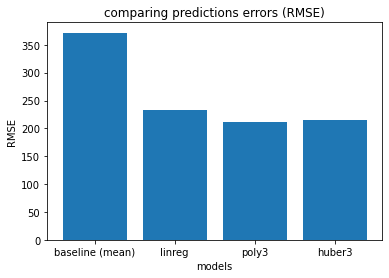

In [19]:
# bar chart to show comparison

# Bar chart
plt.bar([1, 2, 3, 4], [rmse_baseline, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4], ["baseline (mean)", "linreg", "poly3", "huber3"])
plt.title('comparing predictions errors (RMSE)')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()